In [25]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [26]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

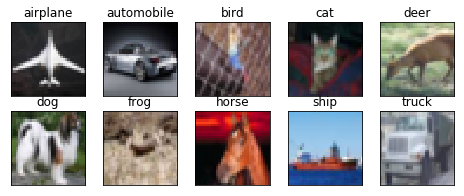

In [27]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [28]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [29]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [30]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# Sequential Model (N/W with out dropout)

In [38]:
model = Sequential()
model.add(Convolution2D(64, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))

model.add(Convolution2D(128, 3, 3,border_mode='same')) #32x32x48
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) # 16x16x48
# model.add(Dropout(0.25))

model.add(Convolution2D(128, 3, 3, border_mode='same')) #16x15x96
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))#8x8x96
# model.add(Dropout(0.25))

model.add(Convolution2D(128, 3, 3, border_mode='same'))#8x8x64
model.add(Activation('relu'))
# model.add(Dropout(0.25))

model.add(Convolution2D(32, 3, 3,border_mode='same'))#8x8x32
model.add(Activation('relu'))
# model.add(Dropout(0.25))

model.add(Convolution2D(16, 3, 3,border_mode='same'))#8x8x16
model.add(Activation('relu'))
# model.add(Dropout(0.25))

# model.add(Convolution2D(10, 3, 3, border_mode='same'))#8x8x10
# model.add(Activation('relu'))
# model.add(Dropout(0.25))

#taking 10 channel out of 100
model.add(Convolution2D(10, 8))#1x1x10

model.add(Convolution2D(10, 1, 1))#1x1x10

# model.add(Convolution2D(10, 8))#1x1x10

model.add(Flatten())#10
model.add(Activation('softmax'))


# model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` c

In [39]:

# from tensorflow.keras.utils import multi_gpu_model

# model_1 = Model(base_model.input, predictions)

# model = multi_gpu_model(model, 2)

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])


In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 128)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
activation_10 (Activation)   (None, 16, 16, 128)       0         
__________

# Connect to Google Drive

In [34]:

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass

!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive

# Model Checkpoint epoch wise

In [41]:
filepath="EVAassgn9B_cutout.hdf5"
# filepath="drive/model_files32/1stbatch1assgn4-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [42]:
# Cutout implimentation it's return eraser crop images
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

# 100 Epoch model evaluation

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=4687, epochs=100)`
  


Epoch 1/100
4687/4687 [==============================] - 36s 8ms/step - loss: 1.8172 - acc: 0.3390 - val_loss: 1.4550 - val_acc: 0.4792

Epoch 00001: val_acc improved from -inf to 0.47920, saving model to EVAassgn9B_cutout.hdf5
Epoch 2/100
4687/4687 [==============================] - 34s 7ms/step - loss: 1.3466 - acc: 0.5124 - val_loss: 1.1076 - val_acc: 0.6094

Epoch 00002: val_acc improved from 0.47920 to 0.60940, saving model to EVAassgn9B_cutout.hdf5
Epoch 3/100
4687/4687 [==============================] - 35s 7ms/step - loss: 1.0535 - acc: 0.6245 - val_loss: 0.9032 - val_acc: 0.6811

Epoch 00003: val_acc improved from 0.60940 to 0.68110, saving model to EVAassgn9B_cutout.hdf5
Epoch 4/100
4687/4687 [==============================] - 34s 7ms/step - loss: 0.8673 - acc: 0.6923 - val_loss: 0.8463 - val_acc: 0.7088

Epoch 00004: val_acc improved from 0.68110 to 0.70880, saving model to EVAassgn9B_cutout.hdf5
Epoch 5/100
4687/4687 [==============================] - 34s 7ms/step - loss: 0


Epoch 00040: val_acc did not improve from 0.79110
Epoch 41/100
4687/4687 [==============================] - 35s 7ms/step - loss: 0.0839 - acc: 0.9720 - val_loss: 1.0779 - val_acc: 0.7903

Epoch 00041: val_acc did not improve from 0.79110
Epoch 42/100
4687/4687 [==============================] - 35s 7ms/step - loss: 0.0800 - acc: 0.9732 - val_loss: 1.1367 - val_acc: 0.7842

Epoch 00042: val_acc did not improve from 0.79110
Epoch 43/100
4687/4687 [==============================] - 35s 7ms/step - loss: 0.0798 - acc: 0.9731 - val_loss: 1.0858 - val_acc: 0.7837

Epoch 00043: val_acc did not improve from 0.79110
Epoch 44/100
4687/4687 [==============================] - 35s 8ms/step - loss: 0.0782 - acc: 0.9732 - val_loss: 1.1577 - val_acc: 0.7903

Epoch 00044: val_acc did not improve from 0.79110
Epoch 45/100
4687/4687 [==============================] - 35s 7ms/step - loss: 0.0772 - acc: 0.9741 - val_loss: 1.1215 - val_acc: 0.7873

Epoch 00045: val_acc did not improve from 0.79110
Epoch 46/


Epoch 00083: val_acc did not improve from 0.79550
Epoch 84/100
4687/4687 [==============================] - 34s 7ms/step - loss: 0.0470 - acc: 0.9840 - val_loss: 1.2675 - val_acc: 0.7892

Epoch 00084: val_acc did not improve from 0.79550
Epoch 85/100
4687/4687 [==============================] - 35s 7ms/step - loss: 0.0463 - acc: 0.9844 - val_loss: 1.2418 - val_acc: 0.7948

Epoch 00085: val_acc did not improve from 0.79550
Epoch 86/100
4687/4687 [==============================] - 35s 7ms/step - loss: 0.0438 - acc: 0.9848 - val_loss: 1.1904 - val_acc: 0.7910

Epoch 00086: val_acc did not improve from 0.79550
Epoch 87/100
4687/4687 [==============================] - 35s 7ms/step - loss: 0.0445 - acc: 0.9849 - val_loss: 1.2290 - val_acc: 0.7879

Epoch 00087: val_acc did not improve from 0.79550
Epoch 88/100
4687/4687 [==============================] - 35s 8ms/step - loss: 0.0430 - acc: 0.9856 - val_loss: 1.2086 - val_acc: 0.7898

Epoch 00088: val_acc did not improve from 0.79550
Epoch 89/

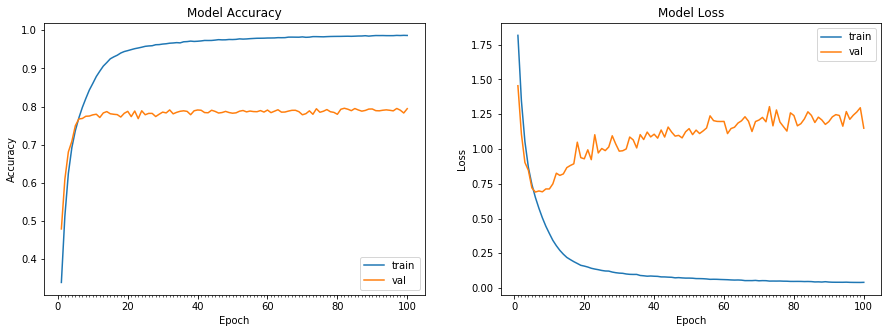

Accuracy on test data is: 79.44


In [43]:
from keras.preprocessing.image import ImageDataGenerator
# from random_eraser import get_random_eraser  # added


datagen = ImageDataGenerator(preprocessing_function=get_random_eraser(v_l=0, v_h=1), zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 32),
                                 samples_per_epoch = 3*train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=callbacks_list)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

#after reaching val_acc=80 & test_acc = 80 model is little overfiting #8x8x10 added dropout.

In [44]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys
import requests
from io import BytesIO
from PIL import Image
%matplotlib inline

# Load save model from gdrive

In [45]:
from keras.models import load_model
model = load_model('EVAassgn9B_cutout.hdf5')

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 128)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
activation_10 (Activation)   (None, 16, 16, 128)       0         
__________

In [47]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys
import requests
import os
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
%matplotlib inline

In [48]:
#Function extracts .png images path from given directory
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
        #   img = image.load_img('images/'+filename, target_size=(224, 224))
        #   img= cv2.resize((224,224))
        #   img = cv2.imread(os.path.join(folder, filename))
        #   if img is not None:
                images.append(folder+'/'+filename)
    return images


#show the images as columns wise, by default columns is 1, required images is numpy array
def show_images(images, cols = 1, titles = None):
    """Display a list of images(numpy array) in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()
    
#images path 
def superimposed_images(img_path, model):
#     img_path = 'images/airplane.png'
    img = image.load_img(img_path, target_size=(32, 32))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    preds = model.predict(x)
    class_idx = np.argmax(preds[0])
    class_output = model.output[:, class_idx]
    last_conv_layer = model.get_layer("activation_34")#change layer according to model
    
    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x])
    for i in range(9):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    
    img = cv2.imread(img_path)
    # img = Image.open(BytesIO(response.content))
    # img = img.resize((224, 224))

    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)

    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

    return superimposed_img
    


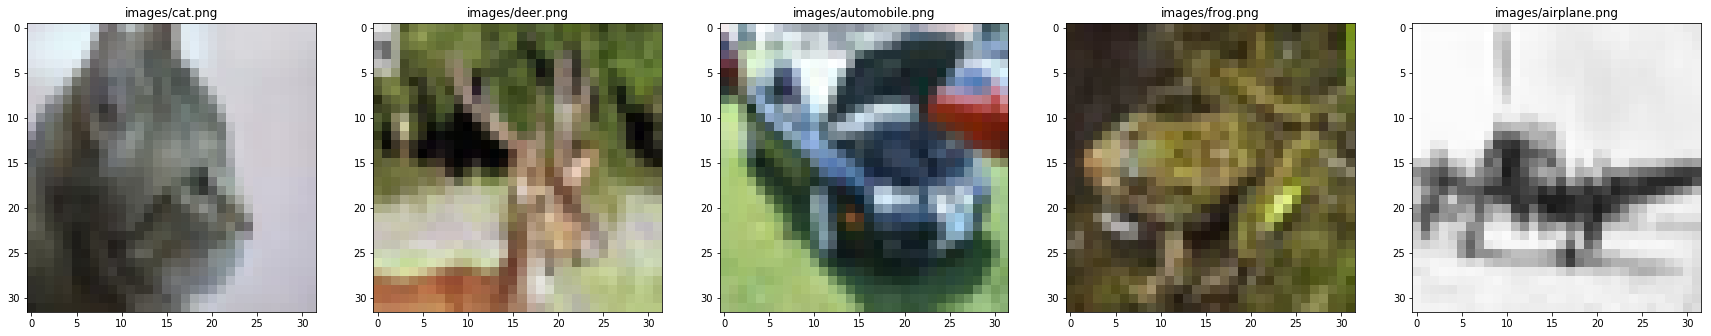

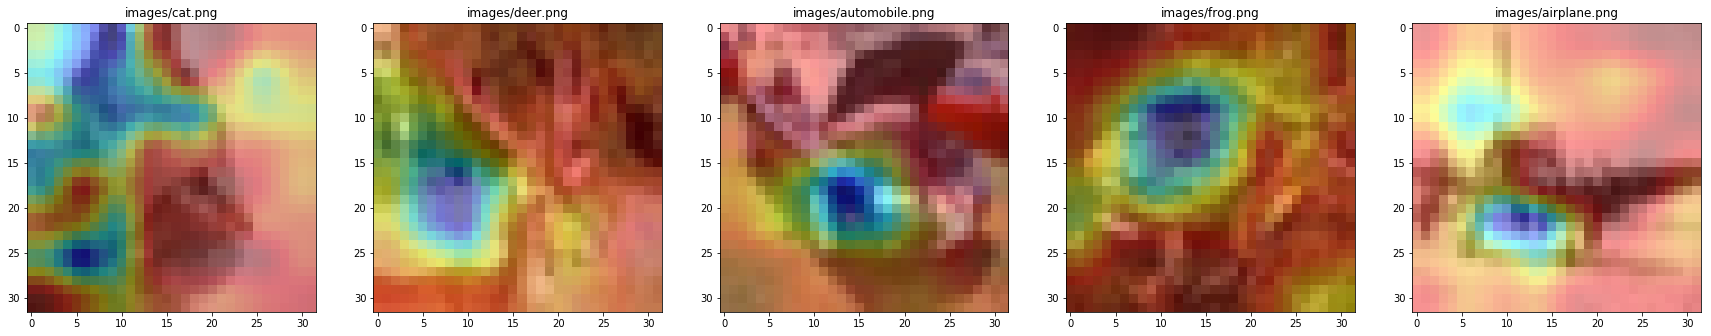

In [49]:
from keras.models import load_model
model = load_model('EVAassgn9.hdf5')

# argument takes folder path and loaded model
def show_img_with_gradCAM(path, model):
    imges = load_images_from_folder(path)
    titles = imges[:5]
    clases = [cv2.imread(img) for img in imges][:5]
    kk = [superimposed_images(img, model) for img in imges][:5]
    show_images(clases,  titles = titles)
    show_images(kk,  titles = titles)
    
show_img_with_gradCAM(path ='images', model = model)

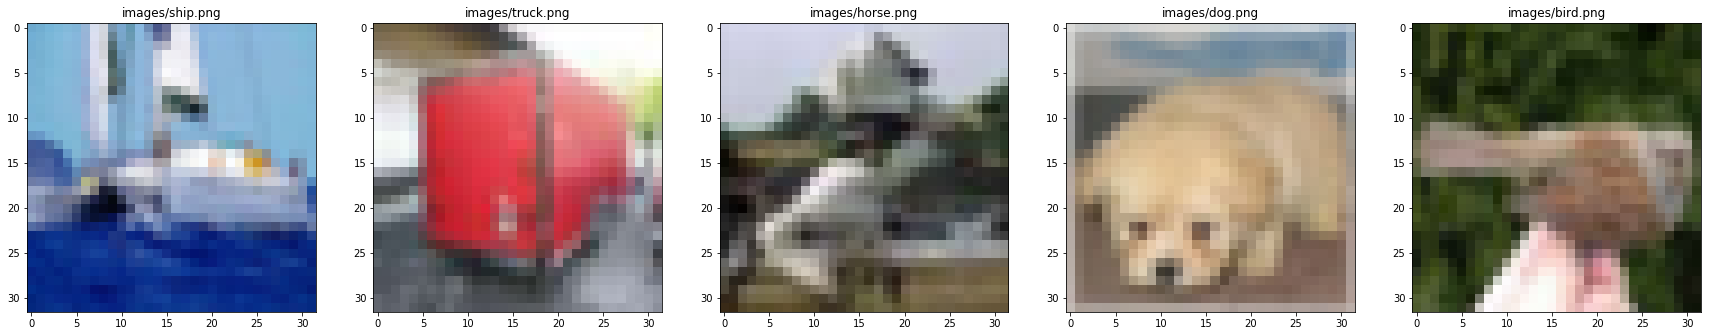

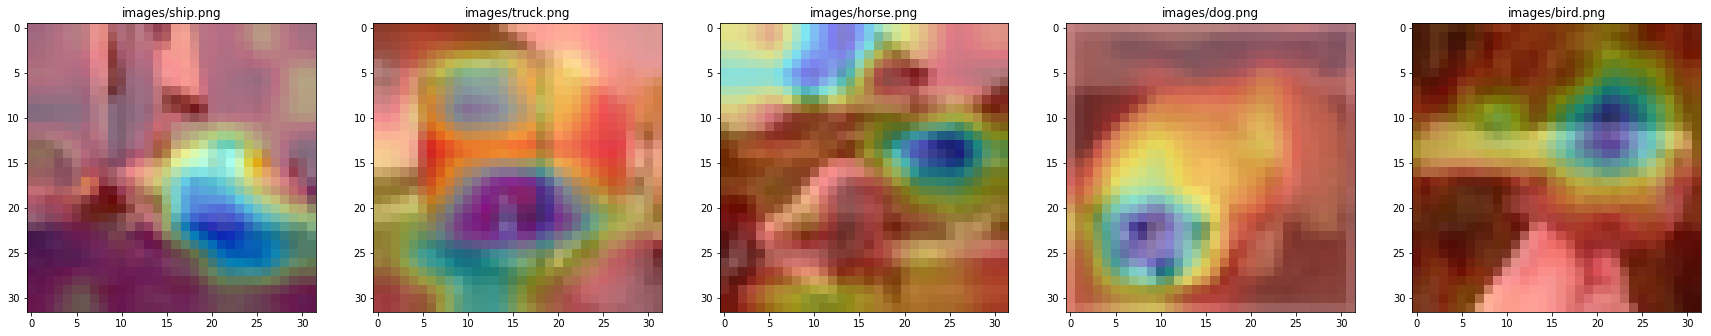

In [50]:
def show_img_with_gradCAM(path, model):
    imges = load_images_from_folder(path)
    titles = imges[5:]
    clases = [cv2.imread(img) for img in imges][5:]
    kk = [superimposed_images(img, model) for img in imges][5:]
    show_images(clases,  titles = titles)
    show_images(kk,  titles = titles)
    
show_img_with_gradCAM(path ='images', model = model)